## Analyzing Backloggd's Top 100 Ranked Video Games

First, we will import several packages:
- **Seaborn** for graphing
- **Pandas** for dataframes
- **Matplotlib** and **pyplot** to graph 
- **Requests** to access website information
- **BeautifulSoup** to extract the html content
- **numpy** for basic arithmetic

In [380]:
## Import packages
import requests
from bs4 import BeautifulSoup ## import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Creating Soups and Webscraping

Backloggd does not have a single page for which we can extract the data. There are 36 video games for each page when filtering by highest average rating, so we must request and obtain information from each one. Thus, three soups will be created to get the top 108 video games.

In [381]:
page1 = requests.get("https://www.backloggd.com/games/lib/rating/")
soup1 = BeautifulSoup(page1.content, 'html.parser')

page2 = requests.get('https://www.backloggd.com/games/lib/rating?page=2')
soup2 = BeautifulSoup(page2.content, 'html.parser')

page3 = requests.get("https://www.backloggd.com/games/lib/rating?page=3")
soup3 = BeautifulSoup(page3.content, 'html.parser')

Next, we begin the webscraping process. However, there are several things to note:
- Backloggd is a dynamic website; video game rankings may slightly change because of individual user ratings affecting the average each day
- Because of this, we must actively update the **date** section in the below cell

The first 3 commented **for loops** in the beginning allow us to extract the date of each game separated by page. However, only one can be run at a time because an error in extracting the information will occur if they're ran all at once (I do not understand why this is the case, but it always happens). Furthermore, we must print the date after the loop so we can see it in the output and copy it into empty date lists. When doing this process, comment out the dataframe, and then uncomment it when the process of collecting the dates is finished. This will ensure the dates are completely accurate to the data. Recomment the first 3 for loops when finished

In [386]:
#Make the below lists EMPTY, and run each for loop separately. Copy and paste the output into each of the empty lists. 
#Alternatively, the lists should not change much or at all if viewing this near the date it was submitted. Thus, this extra step
#can be skipped if that is the case.

#Comment out the dataframe at the bottom beforehand

#date1 should correspond with the first for loop dates, date2 with the second for loop dates, and so forth

date1 = ['2006', '2021', '2015', '2005', '2019', '2011', '2004', '2009', '2001', '2007', '2019', '2007', '2020', '2016', '2011', '2019', '2021', '2012', '2011', '2015', '2021', '2019', '2011', '2010', '2002', '2011', '1995', '2004', '2015', '2008', '2020', '2012', '2021', '2006', '2018', '2021']
date2 = ['2017', '2005', '2001', '2019', '2016', '2012', '2000', '2004', '2007', '2012', '2020', '2019', '2011', '1997', '2007', '2014', '2019', '2006', '2011', '2009', '2020', '2017', '2007', '2005', '2018', '2017', '2021', '1994', '2020', '2000', '2000', '2005', '2011', '2014', '1999', '2017']
date3 = ['2018', '2017', '2014', '2015', '2017', '2020', '2002', '2021', '1994', '2007', '2019', '2021', '2002', '2021', '2018', '2006', '2019', '2013', '2007', '2019', '2010', '2010', '2005', '2011', '2004', '2003', '2006', '2005', '2019', '1998', '2015', '2010', '1999', '2004', '2014', '2018']
#The first for loop corresponds to the 1st page, the second to the 2nd page, and the third to the 3rd page
    
#for link in soup1.find_all(class_="cover-link"):
#    game = (link.get('href'))
#    pageIn = requests.get('https://www.backloggd.com'+game)
#    soupIn = BeautifulSoup(pageIn.content, 'html.parser')
#    gameIn = soupIn.find(class_='sub-title')
#    for i in (gameIn.find_all('a', href=True)):
#        a = i['href']
#        b = a.replace('/games/lib/popular/release_year_custom:','')
#        date = b.replace('/','')
#        date1.append(date)
#print(date1)
        
#for link in soup2.find_all(class_="cover-link"):
#    game2 = (link.get('href'))
#    pageIn2 = requests.get('https://www.backloggd.com'+game2)
#    soupIn2 = BeautifulSoup(pageIn2.content, 'html.parser')
#    gameIn2 = soupIn2.find(class_='sub-title')
#    for i in (gameIn2.find_all('a', href=True)):
#        a = i['href']
#        b = a.replace('/games/lib/popular/release_year_custom:','')
#        date_2 = b.replace('/','')
#        date2.append(date_2)
#print(date2) 
    
#for link in soup3.find_all(class_="cover-link"):
#    game3 = (link.get('href'))
#    pageIn3 = requests.get('https://www.backloggd.com'+game3)
#    soupIn3 = BeautifulSoup(pageIn3.content, 'html.parser')
#    gameIn3 = soupIn3.find(class_='sub-title')
#    for i in (gameIn3.find_all('a', href=True)):
#        a = i['href']
#        b = a.replace('/games/lib/popular/release_year_custom:','')
#        date_3 = b.replace('/','')
#        date3.append(date_3)
#print(date3)
        
#All 108 dates in a single list used to append to dataframe
totalDate = date1 + date2 + date3 

#Empty lists that will be appended with video game titles
gameList1 = []
gameList2 = []
gameList3 = []

#Empty lists that will be appended with the rating for the corresponding video game
rating1 = []
rating2 = []
rating3 = []

#Using soups for each page to extract ratings later
Games1 = soup1.find_all(class_="col-2 my-2 px-1 px-md-2")
Games2 = soup2.find_all(class_="col-2 my-2 px-1 px-md-2")
Games3 = soup3.find_all(class_="col-2 my-2 px-1 px-md-2")

#The following 3 for loops give us the title. Appends each result to the corresponding game list
for link in soup1.find_all(class_="game-text-centered"):
    c = link.get_text()
    gameList1.append(c)

for link in soup2.find_all(class_="game-text-centered"):
    c = link.get_text()
    gameList2.append(c)

for link in soup3.find_all(class_="game-text-centered"):
    c = link.get_text()
    gameList3.append(c)
    
    
#The next 3 for loops allow us to extract the ratings for each game corresponding to the title.
#Appends these to the lists for rating
for text in Games1:
    rating = text.find(class_="mb-0 avg-rating").get_text()
    rate = rating.replace('Avg ', '')
    rating1.append(rate)
    
for text in Games2:
    rating = text.find(class_="mb-0 avg-rating").get_text()
    rate = rating.replace('Avg ', '')
    rating2.append(rate)

for text in Games3:
    rating = text.find(class_="mb-0 avg-rating").get_text()
    rate = rating.replace('Avg ', '')
    rating3.append(rate)

#Just like totalDate, we are combining all lists into one single list to add to the dataframe
totalRate = rating1 + rating2 + rating3
    
#Combines all video game titles into one list for the dataframe
total = gameList1 + gameList2 + gameList3

#Using a while loop to add ranks from 1 - 108 sequentially. Mainly done for dataframe visualization purposes
i = 1
rank = []
while i < 109:
    rank.append(i)
    i = i + 1    

#Titles for video games based on developer region. Japan is missing because we don't require it for later
America = {'Deus Ex','Half-Life: Alyx', 'Outer Wilds', 'Fallout: New Vegas - Ultimate Edition', 'Mass Effect Legendary Edition', 'ULTRAKILL', 'The Binding of Isaac: Repentance', 'The Orange Box', 'Portal 2', 'Pathologic 2', 'Hades', 'Deltarune: Chapter 2', 'Planescape: Torment', 'Return of the Obra Dinn', 'Lisa', 'Shovel Knight: Specter of Torment', 'Psychonauts 2', 'Red Dead Redemption 2', 'Fallout: New Vegas', 'Shovel Knight: Treasure Trove'}
Europe = {'Disco Elysium: The Final Cut', 'Disco Elysium', 'The Witcher 3: Wild Hunt - Game of the Year Edition', 'The Witcher 3: Wild Hunt - Hearts of Stone', 'The Witcher 3: Wild Hunt - Blood and Wine', 'Ori and the Will of the Wisps'}
Australia = {"Hollow Knight: Voidheart Edition",'Hollow Knight'}

#We create an arbitrary column with variables for now so we can change it later in the dataframe
i = 0
comp = []
while i < 108:
    comp.append(i)
    i = i + 1    

#Create main columns, rename as necessary
df = pd.DataFrame(total)
df = df.rename(columns={0:'Video Game Title'})
df['Average Rating'] = totalRate
df['Rank'] = rank
df['Developer'] = comp

#Changing the arbitrary list from earlier into one where, based on video game titles, we change the region to which 
#developer location it corresponds to
for i in df['Developer']:
    if df['Video Game Title'][i] in America:
        df['Developer'] = df['Developer'].replace({i:"North America"})
    elif df['Video Game Title'][i] in Europe:
        df['Developer'] = df['Developer'].replace({i:"Europe"})
    elif df['Video Game Title'][i] in Australia:
        df['Developer'] = df['Developer'].replace({i:"Australia"})
    else:
        df['Developer'] = df['Developer'].replace({i:"Japan"})

#Add the date column, index by rank
#Comment out 'newdf' here if doing the date changing process
df['Date'] = totalDate
pd.set_option('display.max_rows', None)
newdf = df.set_index('Rank')
newdf


,Video Game Title,Average Rating,Developer,Date
Rank,,,,
1,Mother 3,4.57,Japan,2006
2,Disco Elysium: The Final Cut,4.57,Europe,2021
3,Bloodborne: The Old Hunters,4.57,Japan,2015
4,Metal Gear Solid 3: Subsistence,4.56,Japan,2005
5,Final Fantasy XIV: Shadowbringers,4.55,Japan,2019
6,Metal Gear Solid 3: Snake Eater HD Edition,4.55,Japan,2011
7,Metal Gear Solid 3: Snake Eater,4.55,Japan,2004
8,Umineko: When They Cry Chiru,4.54,Japan,2009
9,Silent Hill 2,4.54,Japan,2001


## Pie Graph For Percent Of Developer Locations For Top 100 Games

First, we show only the first 100 rows.

In [388]:
df100 = df.head(100)
df100

,Video Game Title,Average Rating,Rank,Developer,Date
0,Mother 3,4.57,1,Japan,2006
1,Disco Elysium: The Final Cut,4.57,2,Europe,2021
2,Bloodborne: The Old Hunters,4.57,3,Japan,2015
3,Metal Gear Solid 3: Subsistence,4.56,4,Japan,2005
4,Final Fantasy XIV: Shadowbringers,4.55,5,Japan,2019
5,Metal Gear Solid 3: Snake Eater HD Edition,4.55,6,Japan,2011
6,Metal Gear Solid 3: Snake Eater,4.55,7,Japan,2004
7,Umineko: When They Cry Chiru,4.54,8,Japan,2009
8,Silent Hill 2,4.54,9,Japan,2001
9,Kingdom Hearts II Final Mix+,4.54,10,Japan,2007


Now we manipulate the data so that only the columns **Location** and **Video Game Title** are showing, with **Developer** as an index.

In [390]:
s = df100.groupby('Developer').count()
m = s.drop(columns = ['Date', 'Average Rating', 'Rank'])
location = ['Australia', 'Europe', 'Japan', 'North America']
m['Location'] = location
m

,Video Game Title,Location
Developer,,
Australia,2,Australia
Europe,6,Europe
Japan,73,Japan
North America,19,North America


Now we plot the process using plotly!

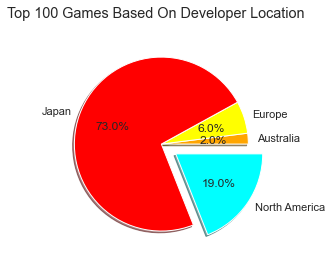

In [391]:
colors = ['Orange', 'Yellow', 'Red', 'cyan']

ex = [0,0,0,0.2] 
#Used to show a slice out of the chart

plt.pie(m['Video Game Title'], colors = colors, labels = m['Location'], explode = ex, autopct='%1.1f%%', shadow = True)
#Video Game Title is used above because we grouped by developer and separated by counts earlier
#This means that column would be filled with the count of games for each location, even though
#the column title does not match, but it fits the purpose.

plt.suptitle('Top 100 Games Based On Developer Location')

plt.show()

The graph illustrates the number of games in the top 100 from each region. Japan has an incredibly high number of games for this website. There could be a number of reasons for this, ranging from the community having a bias toward Japanese media to Japan just making excellent games beloved by a wide audience. A pie graph seemed most suitable to display this since there were multiple regions, each varying in amount of games, and there were few categorical variables. This makes it easy to digest for the viewer.

Notice how there's extra emphasis on North America. Later, we will use this variable for our statistics test.

## Bar Graph For Count Of Games Per Date In Top 100

We change the dataframe so that we get only the date and count of games per date.

In [392]:
dfBar = df100.drop(columns = ['Video Game Title', 'Rank', 'Average Rating'])
bar = dfBar.groupby('Date').count().reset_index()
nbar = bar.rename(columns={'Developer':'Count'})
nbar

,Date,Count
0,1994,2
1,1995,1
2,1997,1
3,1999,1
4,2000,3
5,2001,2
6,2002,3
7,2003,1
8,2004,4
9,2005,6


Then, we plot the graph using Seaborn.

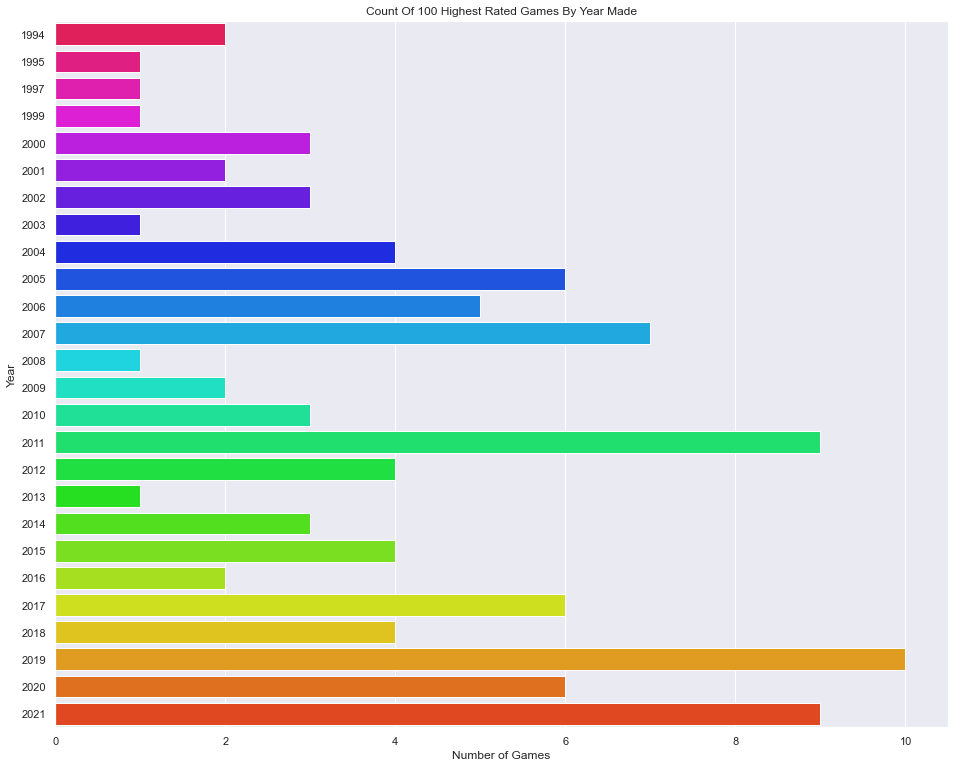

In [393]:
fig, ax = plt.subplots(figsize=(16,13))
sns.barplot(y = nbar['Date'], x = nbar['Count'], orient =  'h', palette = 'hsv_r')
plt.title('Count Of 100 Highest Rated Games By Year Made')
plt.xlabel('Number of Games')
plt.ylabel('Year')
plt.show()

The data visualizes the amount of games in the top 100 based on the year it was released. The graph had to be made slightly larger than normal to fit all the years cleanly.

It seemed most suitable to choose a bar graph because with so many labels for years, the data would not fit or look clear to the viewer if it was done on a pie chart. Each year has been colorized by bar to show what different years correspond to. It's easy to draw connections because of this. For instance, we can see that there is an overall trend of games in the later years having a higher count than games in early years. This might suggest that because of the many technological advancements in the industry, higher quality games are able to be developed. However, this is only one interpretation.

## Boxplot For Distribution Of Game Ratings Per Decade

Lastly, we create a dataframe to analyze the 2000s and 2010s decade for video game ratings.

In [394]:
new = df100.drop(columns = ['Video Game Title', 'Rank', 'Developer'])
new['Average Rating'] = new['Average Rating'].astype(float)
mean = new.groupby('Date').mean().reset_index()
mean['Date'] = mean['Date'].astype(int)
newMean = mean.drop([0,1,2,3,24,25])
newMean

,Date,Average Rating
4,2000,4.353333
5,2001,4.465000
6,2002,4.353333
7,2003,4.280000
8,2004,4.410000
9,2005,4.365000
10,2006,4.382000
11,2007,4.395714
12,2008,4.430000
13,2009,4.450000


We need to group the years by decade. The following allows us to do this

Note: rows that had the date as less than 2000 or greater than 2019 were excluded in this new dataframe

In [395]:
for i in newMean['Date']:
    if i < 2010:
        newMean['Date'] = newMean['Date'].replace({i:'2000s'})
    else:
        newMean['Date'] = newMean['Date'].replace({i:'2010s'})

#IF there is an initial error in this cell, run it again. It should work eventually
newMean

,Date,Average Rating
4,2000s,4.353333
5,2000s,4.465000
6,2000s,4.353333
7,2000s,4.280000
8,2000s,4.410000
9,2000s,4.365000
10,2000s,4.382000
11,2000s,4.395714
12,2000s,4.430000
13,2000s,4.450000


And now we plot using Seaborn. The range for average rating is between 0 and 5 in total, but for the top 100 games the range is much higher.

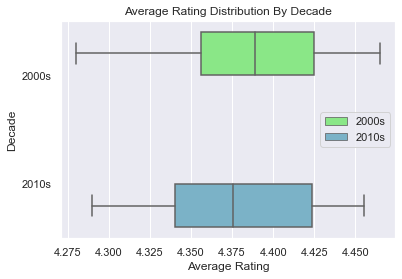

In [396]:
sns.boxplot(y = 'Date', x = 'Average Rating', data = newMean, hue = 'Date', palette = ['#7bf777','#6eb7d4'])
plt.legend(loc = 'center right')
plt.title('Average Rating Distribution By Decade')
plt.xlabel('Average Rating')
plt.ylabel('Decade')
plt.show()

Note: This graph does not display the top 100 games, but a number slightly less than that. Some games in the top 100 were made before 2000 or after 2019, so those games had to be excluded for this graph.

The graph illustrates the distribution of the average rating for top games made in the 2000s or the 2010s. There seems to be slightly more variation in the 2000s decade, but that same decade has a higher mean score than the most recent decade. This makes my earlier interpretation unclear because I had said that because of technology advancing, better games were able to be made and thus more counts of games showed up in later years. But now, we can see that the 2000s had a higher average rating than the 2010s, leading me to think that maybe games of all eras are enjoyed by the community quite equally.

The boxplot was chosen specifically to show the shape of the distributions. The 2000s seem slightly skewed to the left, while the 2010s is approximately Normal. 

It's important to note that the above graphs may vary very slightly to the way I described it depending on the time this is viewed. Backloggd is a dynamic website, so there could be a game that enters the top 100 that was not there before; it's based on user ratings, updated every second.

## Statistical Analysis: Two Mean Pooled T-Hypothesis Test

For this analysis, I wanted to see if there was a significant difference in the games that people preferred in the top 100. More specifically, I wanted to test whether the mean average rating for Japanese games was greater than North American games. This requires using a **two mean pooled T-hypothesis test**. 

Requirements:
- Samples are independent and random
- Both are large enough or both populations are normally distributed
- Unknown population standard deviations are the same for the 2 populations

All of the requirements were met, with the 2nd one being what we would expect if we look at the boxplot used previously. While the boxplot didn't visualize North America and Japan specifically, we can infer it would look similarly distributed. If it isn't then we will assume both populations are normally distributed.

The first requirement is met because each game is a self-contained package. While there are some DLCs included and this could be argued to be dependent, we will assume they are treated as independent.

The last requirement is met as the ratio of both standard deviations is less than two.


Steps:
- $H_o$: $\mu_1$ - $\mu_2 = 0$: The true mean average rating for both populations is equal
- $H_A$: $\mu_1$ > $\mu_2$: The true mean average rating for Japan is higher than North America's

$t_{obs}$ = $\frac{(\bar x_{1} - \bar x_{2}) - \mu_0}{S_p \cdot \sqrt (\frac{1}{n_1} + \frac{1}{n_2})}$

$S_p$ = $\sqrt \frac{(n_{1}-1)s_{1}^2 + (n_{2}-1)s_{2}^2}{n_1 + n_2 - 2}$

$df = n_1 + n_2 - 2$

P-value is obtained from looking at our test statistic and seeing the probability of getting a test statistic higher than the one that we observed.

We want to perform a significance test at the 5% level. So, we must see whether or not our p-value is less than $\alpha = .05$ to determine whether or not we reject the null hypothesis $H_o$

We must first change the data into desired dataframes

In [397]:
loca = {'Europe', 'Australia'} #Want to get rid of these regions
for i in newdf['Developer']:
    if i in loca:
        newdf['Developer'] = newdf['Developer'].replace({i:'0'})

newdf = newdf.head(100)
m = newdf.reset_index()
y = m.drop(columns = ['Video Game Title','Date','Rank'])
y['Average Rating'] = y['Average Rating'].astype(float)
z = y.groupby('Developer').mean()
z

,Average Rating
Developer,
0,4.425000
Japan,4.388630
North America,4.379474


Clean the data while adding dataframes for SD and count as well

In [398]:
#We must drop the region named 0, the one we used to replace Europe and Australia
mean = z.drop(['0'])

#Obtain dataframes for SD and count while dropping region 0, like above
s = y.groupby('Developer').std()
std = s.drop(['0'])

count = y.groupby('Developer').count()
count = count.drop(['0'])
display(std)
display(count)

,Average Rating
Developer,
Japan,0.089292
North America,0.078985


,Average Rating
Developer,
Japan,73
North America,19


Gather the numerical values of the variables

In [399]:
#Extract the values for Mean, SD, and Count from each dataframe
mean_japan = mean['Average Rating'].values[0]
mean_na = mean['Average Rating'].values[1]

std_japan = std['Average Rating'].values[0]
std_na = std['Average Rating'].values[1]

count_japan = count['Average Rating'].values[0]
count_na = count['Average Rating'].values[1]

Enter equations for the hypothesis test using the previous values

In [400]:
#Equations for the Two Mean Pooled T-Hypothesis Test. Use the values that were extracted in these equations
sp = np.sqrt((((count_japan - 1)*(std_japan**2)) + ((count_na - 1)*(std_na**2)))/(count_japan + count_na - 2))
df = count_japan + count_na - 2
tobs = (mean_japan - mean_na)/(sp*np.sqrt((1/count_japan) + (1/count_na)))

#Looked at T-chart, p-value is approximated
pvalue = .33 

Lastly, create two new dataframes to display results

In [401]:
#Create lists so that it can be put in a new dataframe
meanList = [mean_japan, mean_na]
stdList = [std_japan, std_na]
countList = [count_japan, count_na]
location = ['Japan','North America']

#Dataframe for Statistics between regions
stats = pd.DataFrame(meanList)
stats = stats.rename(columns={0:'Mean'})
stats['Standard Deviation'] = stdList
stats['Count'] = countList
stats['Location'] = location
stats = stats.set_index('Location')

#Lists for dataframe for the t-test
tList = [tobs]
pvalList = [pvalue]
degreeList = [df]
rowList = ['']

#T-test dataframe
t_test = pd.DataFrame(tList)
t_test = t_test.rename(columns={0:'T statistic'})
t_test['P-value'] = pvalList
t_test['df'] = degreeList
t_test[''] = rowList
t_test = t_test.set_index('')

#Display results
display(stats)
display(t_test)

,Mean,Standard Deviation,Count
Location,,,
Japan,4.388630,0.089292,73
North America,4.379474,0.078985,19


,T statistic,P-value,df
,,,
,0.407115,0.33,90


Because the p-value 0.33 is much greater than our significance level $\alpha = .05$, we fail to reject $H_o$. Evidence strongly suggests that Japan's average rating for the top 100 games is not greater than North America's. Because we did not do a test for difference (two-tailed test), we cannot determine whether Japan's average rating is less than North America's.

## Follow Up

There are quite a bit of things that may make researching something similar more interesting. For instance, analyzing the most popular 100 games could yield vastly different results than what was seen here. Since the rating scale goes from 0 to 5,  the distributions may show more skewness since the majority of games seem to be in the 3 range. The downside to this is that that it may take too long to gather the rating, because the method we used for gathering the date in this project would have to also apply to the rating in this hypothetical project. It may take lots of time to gather that info, since we are accessing two pages for each game and doing this for both ratings and dates.

Analyzing all the games that were released in a specific year, say 2012, may also be something to look into. Viewing the distributions of all games yearly could tell a story that we couldn't see in this project. 

For this dataset specifically, something else that could have been done was comparing the ratings between games that are sequels and games that are not. Many games in this dataframe are sequels to another, so it would be intriguing to see how they fare against those that aren't.